In [33]:
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import numpy as np

print(tf.__version__)

2.0.0-rc1


In [3]:
#리뷰는 미리 전처리해서 정수 시퀀스로 변환되어 있고, 각 정수는 어휘 사전에 있는 특정단어를 의미
imdb = keras.datasets.imdb
(train_data,train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
#상위 10000개의 단어 선택

In [6]:
#데이터 탐색 : 데이터셋은 전처리된 정수 배열, 레이블은 0(부정), 1(긍정)
print("훈련 샘플: {}, 레이블 : {}".format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 레이블 : 25000


In [7]:
#리뷰 텍스트는 어휘 사전의 특정 단어를 나타내는 정수로 변환
#첫 번째 리뷰 확인
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [9]:
#각 리뷰의 길이는 다르다.
#신경망의 입력은 길이가 같아야하기때문에 나중에 이 문제 해결!!
len(train_data[0]), len(train_data[1])

(218, 189)

In [11]:
#정수를 단어로 다시 변환하기
#정수와 문자열을 매핑한 dictionary 객체에 질의하는 helper 함수를 만든다.

#단어와 정수 인덱스를 매핑한 dictionary
word_index = imdb.get_word_index()

#처음 몇 개 인덱스는 사전에 정의되어 있다.
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 #unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

def decode_review(text):
    return ''.join([reverse_word_index.get(i,'?') for i in text])

In [12]:
decode_review(train_data[0])

"<START>thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert<UNK>isanamazingactorandnowthesamebeingdirector<UNK>fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor<UNK>andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso<UNK>tothetwolittleboy'sthatplayedthe<UNK>ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe<UNK>listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

In [13]:
#데이터 준비
#리뷰(정수 배열)는 신경망에 주입하기 전에 텐서로 변환해야한다.
#1번째 변환방법 = one-hot encoding : 메모리 많이 사용
#2번째 변환방법 = padding 추가 : 정수 배열 길이 갇도록 padding 추가
#여기서는 2번째 방법 사용

In [15]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value = word_index["<PAD>"],
                                                        padding = 'post',
                                                        maxlen = 256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                        value = word_index["<PAD>"],
                                                        padding = 'post',
                                                        maxlen = 256)

In [16]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [17]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [20]:
#모델 구성 : 2가지를 결정해야한다.
#모델에서 얼마나 많은 층을 사용할 것인가
#각 층에서 얼마나 많은 hidden unit을 사용할 것인가

#입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기(10,000개의 단어)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape = (None,)))
#정수로 인코딩된 단어를 입력받고 각 단어 인덱스에 해당하는 임베딩 벡터를 찾는다.
#출력벡터에 새로운 차원을 추가한다.(batch, sequence, embedding)
model.add(keras.layers.GlobalAveragePooling1D())
#sequence 차원의 평균을 계산해서 각 샘플에 대해 고정된 길이의 출력 벡터 반환
#길이가 다른 입력을 다루는 가장 간단한 방법
model.add(keras.layers.Dense(16, activation = 'relu'))
#16개의 hiden unit을 가진 fully-connected layer
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
#sigmoid를 거쳐서 0~1사이의 확률 또는 신뢰도값 1개 output으로

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [21]:
#은닉 유닛 hidden unit
#위 모델에서 2개의 hidden layer가 있다.
#각 레이어의 출력의 개수 = 층이 가진 표현 공간 representational space의 차원이 된다.
#즉, 내부 표현을 학습할 때 허용되는 네트워크 자유도의 양이다.

#모델에 많은 hidden unit(고차원의 표현 공간)과 층이 있다면 네트워크는 더 복잡한 표현 가능
#but 계산 비용이 많이 들고 원치않은 패턴 학습 가능 => overfitting 문제점이 있다.

In [22]:
#Loss functino과 Optimizer
#모델이 훈련하려면 Loss와 Optimizer 필요
#일반적으로 확률 : binary_crossentropy

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [25]:
#검증 세트 만들기 validation set
#모델 훈련할때 validation set으로 정확도 확인하는것이 좋다.
#이 때 train_data에서 샘플을 떼어내야한다!!! 우리의 목표는 only train_data로 모델 개발 및 튜닝
#test_data는 단지 딱 한번만 정확도 평가

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [26]:
#모델 훈련 : 512개의 샘플로이루어진 mini-batch에서 40번의 epochs동안 훈련
#x_train, y_train 텐서에 있는 모든 샘플에 대해 40번 반복한다는 뜻
#훈련하는 동안 10,000개의 validation set에서 모델의 손실과 정확도를 모니터링

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 40,
                   batch_size = 512,
                   validation_data = (x_val, y_val),
                   verbose = 1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
15000/15000 [==============================] - 2s 105us/sample - loss: 0.6917 - accuracy: 0.5929 - val_loss: 0.6898 - val_accuracy: 0.5303
Epoch 2/40
15000/15000 [==============================] - 1s 56us/sample - loss: 0.6852 - accuracy: 0.6700 - val_loss: 0.6807 - val_accuracy: 0.7021
Epoch 3/40
15000/15000 [==============================] - 1s 56us/sample - loss: 0.6716 - accuracy: 0.7336 - val_loss: 0.6639 - val_accuracy: 0.7391
Epoch 4/40
15000/15000 [==============================] - 1s 56us/sample - loss: 0.6481 - accuracy: 0.7644 - val_loss: 0.6373 - val_accuracy: 0.7691
Epoch 5/40
15000/15000 [==============================] - 1s 63us/sample - loss: 0.6135 - accuracy: 0.7930 - val_loss: 0.6006 - val_accuracy: 0.7851
Epoch 6/40
15000/15000 [==============================] - 1s 59us/sample - loss: 0.5694 - accuracy: 0.8143 - v

In [29]:
#모델 평가
result = model.evaluate(test_data, test_labels, verbose = 2)

print(result) #loss과 accuracy 반환
#매우 단순한 모델이라 87%의 정확도이고 고급 방법을 사용한 모델은 95%에 가까운 정확도 보임

25000/1 - 1s - loss: 0.3547 - accuracy: 0.8719
[0.3321869279575348, 0.87192]


In [31]:
#정확도와 손실 그래프 보기 : model.fit()은 history 객체 반환 => literally history
history_dict = history.history
history_dict.keys()
#4개의 지표가 있고 이것들이 훈련, 검증 단계에서 모니터링하는 지표

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

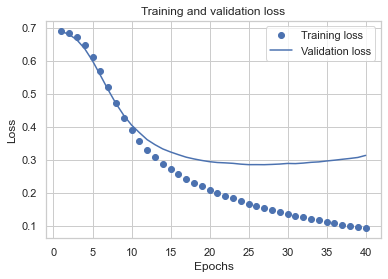

In [39]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

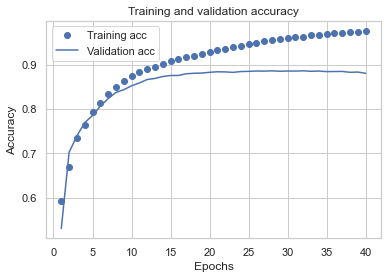

In [42]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
#validation set같은 경우 20 epochs 부근이 최적점이다. Overfitting 때문
#즉, 이 지점부터는 테스트 데이터에서 일반화되기 어려운 훈련 데이터 특정까지 학습하니까 그냥 단순하게 훈련 멈추는 방법이 있다.
#As knowned "Callback" method